
# Unsupervised Learning: KMeans Clustering
___

To apply unsupervised learning for our study, we will be using KMeans Clustering to cluster significant factors affecting the food preferences of of DLSUD's CSIT Students.

___
**Note:** *Even though we possess the labels for this dataset, we will refrain from utilizing them in the KMeans clustering algorithm as it operates on the principle of unsupervised learning.*

Typically, the KMeans algorithm is employed when there are no available labels. However, in this specific case, we will utilize the labels to evaluate the performance of the algorithm. It's important to note that in real-world scenarios, such as the one presented in this project, the inclusion of a classification report and confusion matrix at the end may not be applicable or meaningful for KMeans, as it deviates from the usual practice.
___

## The Data

The dataset we will be using consists of 118 observations, encompassing 16 variables.

* **eat_inside_campus** : A factor with categories YES and NO indicating if they usually eat inside or outside the DLSUD campus.
* **gender** : Gender of a CSIT student 
* **age** : Age of a CSIT student 
* **residence** : Residence of a CSIT student 
* **daily_allowance** : Daily allowance of a CSIT student per day
* **onsite_class** : How often a CSIT student attend onsite classes
* **leave_school_time** : Time a CSIT student usually go home or leave DLSUD
* **walking_distance** : The total walking distance a CSIT student take to go between classes and extracurricular activities
* **number_of_breaks** : Number of lunch breaks a CSIT student have per day
* **transportation** : Mode of transportation a CSIT student usually take
* **usual_food_place_inside_campus** : The usual place where a CSIT student order food inside the campus
* **usual_food_inside_campus** : The usual ordered food of a CSIT student inside the campus
* **usual_food_expense_inside_campus** : The usual food expense of a CSIT student inside the campus
* **usual_food_place_outside** : The usual place where a CSIT student order food outside the campus
* **usual_food_outside** : The usual ordered food of a CSIT student outside the campus
* **usual_food_expense_outside** : The usual food expense of a CSIT student outside the campus

## Import Libraries

***Importing the libraries required for data analysis.***

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

## Getting the Data

* Each features were transformed into label encoded values to be able to feed to the KMeans model.

#### *Feature/Factor: gender
##### Values:
- **Label Code:** 0, **Original value:** Female
- **Label Code:** 1, **Original value:** Male
- **Label Code:** 2, **Original value:** Prefer not to say

#### Feature/Factor: age
##### Values:
- **Label Code:** 0, **Original value:** 18
- **Label Code:** 1, **Original value:** 19
- **Label Code:** 2, **Original value:** 20
- **Label Code:** 3, **Original value:** 21
- **Label Code:** 4, **Original value:** 22
- **Label Code:** 5, **Original value:** 23
- **Label Code:** 6, **Original value:** 25

#### Feature/Factor: residence
##### Values:
- **Label Code:** 0, **Original value:** Bacoor
- **Label Code:** 1, **Original value:** Dasma
- **Label Code:** 2, **Original value:** General Trias
- **Label Code:** 3, **Original value:** Imus
- **Label Code:** 4, **Original value:** Kawit
- **Label Code:** 5, **Original value:** Naic
- **Label Code:** 6, **Original value:** Outside Cavite
- **Label Code:** 7, **Original value:** Silang

#### Feature/Factor: daily_allowance
##### Values:
- **Label Code:** 0, **Original value:** 200 to 500 pesos
- **Label Code:** 1, **Original value:** Below ₱100
- **Label Code:** 2, **Original value:** ₱100 to ₱200
- **Label Code:** 3, **Original value:** ₱200 to ₱500
- **Label Code:** 4, **Original value:** ₱500 to ₱1,000

#### Feature/Factor: onsite_class
##### Values:
- **Label Code:** 0, **Original value:** 1 to 2 times a week
- **Label Code:** 1, **Original value:** 3 to 4 times a week

#### Feature/Factor: leave_school_time
##### Values:
- **Label Code:** 0, **Original value:** Early Afternoon (e.g. 1:00PM, 3:00PM)
- **Label Code:** 1, **Original value:** Evening (e.g. 6:00PM, 7:00PM)
- **Label Code:** 2, **Original value:** Late Afternoon (e.g. 4:00PM, 5:00PM)
- **Label Code:** 3, **Original value:** Morning (e.g. 10:00AM)
- **Label Code:** 4, **Original value:** Noon (12:00PM)

#### Feature/Factor: walking_distance
##### Values:
- **Label Code:** 0, **Original value:** Around 1km (approx. distance from Gate 3 to Food Square)
- **Label Code:** 1, **Original value:** Less than 500m (approx. distance from Gate 3 to SHS building)
- **Label Code:** 2, **Original value:** Less than or around 1km (approx. distance from Gate 3 to SHS building and back)
- **Label Code:** 3, **Original value:** More than 1km
- **Label Code:** 4, **Original value:** nan

#### Feature/Factor: number_of_breaks
##### Values:
- **Label Code:** 0, **Original value:** 1 break
- **Label Code:** 1, **Original value:** 2-3 breaks

#### Feature/Factor: transportation
##### Values:
- **Label Code:** 0, **Original value:** Bicycle
- **Label Code:** 1, **Original value:** Commute (e.g. jeep, bus, tricycle)
- **Label Code:** 2, **Original value:** Personal transportation (e.g. car, motorcycle)
- **Label Code:** 3, **Original value:** Walking

#### Feature/Factor: eat_inside_campus
##### Values:
- **Label Code:** 0, **Original value:** No
- **Label Code:** 1, **Original value:** Yes

#### Feature/Factor: usual_food_place_inside_campus
##### Values:
- **Label Code:** 0, **Original value:** Food Square
- **Label Code:** 1, **Original value:** Jefcees,
- **Label Code:** 2, **Original value:** Milas' Canteen
- **Label Code:** 3, **Original value:** None

#### Feature/Factor: usual_food_inside_campus
##### Values:
- **Label Code:** 0, **Original value:** Beverages (e.g., fruit/milk shake, lemonade, coffee, etc), Water, I bring my own food
- **Label Code:** 1, **Original value:** Finger foods (e.g., fries, takoyaki, etc)
- **Label Code:** 2, **Original value:** Finger foods (e.g., fries, takoyaki, etc), Beverages (e.g., fruit/milk shake, lemonade, coffee, etc)
- **Label Code:** 3, **Original value:** None
- **Label Code:** 4, **Original value:** Rice meal
- **Label Code:** 5, **Original value:** Rice meal, Beverages (e.g., fruit/milk shake, lemonade, coffee, etc)
- **Label Code:** 6, **Original value:** Rice meal, Beverages (e.g., fruit/milk shake, lemonade, coffee, etc), Water
- **Label Code:** 7, **Original value:** Rice meal, Finger foods (e.g., fries, takoyaki, etc), Beverages (e.g., fruit/milk shake, lemonade, coffee, etc)
- **Label Code:** 8, **Original value:** Rice meal, Finger foods (e.g., fries, takoyaki, etc), Beverages (e.g., fruit/milk shake, lemonade, coffee, etc), I bring my own food
- **Label Code:** 9, **Original value:** Rice meal, Finger foods (e.g., fries, takoyaki, etc), Beverages (e.g., fruit/milk shake, lemonade, coffee, etc), Water
- **Label Code:** 10, **Original value:** Rice meal, Finger foods (e.g., fries, takoyaki, etc), Beverages (e.g., fruit/milk shake, lemonade, coffee, etc), Water, I bring my own food
- **Label Code:** 11, **Original value:** Rice meal, Finger foods (e.g., fries, takoyaki, etc), I bring my own food
- **Label Code:** 12, **Original value:** Rice meal, Finger foods (e.g., fries, takoyaki, etc), Water
- **Label Code:** 13, **Original value:** Rice meal, I bring my own food
- **Label Code:** 14, **Original value:** Rice meal, Water
- **Label Code:** 15, **Original value:** Rice meal, Water, I bring my own food

#### Feature/Factor: usual_food_expense_inside_campus
##### Values:
- **Label Code:** 0, **Original value:** Above 500 pesos
- **Label Code:** 1, **Original value:** Below ₱100
- **Label Code:** 2, **Original value:** None
- **Label Code:** 3, **Original value:** ₱100 to ₱200
- **Label Code:** 4, **Original value:** ₱200 to ₱500

#### Feature/Factor: usual_food_place_outside
##### Values:
- **Label Code:** 0, **Original value:** 7 Nov
- **Label Code:** 1, **Original value:** 7-Eleven
- **Label Code:** 2, **Original value:** District Imus
- **Label Code:** 3, **Original value:** Food shops in front of Gate 1 (e.g Lainn's)
- **Label Code:** 4, **Original value:** Gate 1
- **Label Code:** 5, **Original value:** Home
- **Label Code:** 6, **Original value:** In front of Gate 1
- **Label Code:** 7, **Original value:** Japanese restaurants in front of gate 1
- **Label Code:** 8, **Original value:** Jollibee
- **Label Code:** 9, **Original value:** Karinderya
- **Label Code:** 10, **Original value:** Lainn's
- **Label Code:** 11, **Original value:** Lainns
- **Label Code:** 12, **Original value:** McDonald's
- **Label Code:** 13, **Original value:** Nag babaon ako 
- **Label Code:** 14, **Original value:** None
- **Label Code:** 15, **Original value:** Orange house
- **Label Code:** 16, **Original value:** Outside Gate 1
- **Label Code:** 17, **Original value:** SM Dasma
- **Label Code:** 18, **Original value:** SM Dasma, CoCo Fresh Tea and Juice
- **Label Code:** 19, **Original value:** SM Dasma, Jollibee
- **Label Code:** 20, **Original value:** SM Dasma, Vista Mall
- **Label Code:** 21, **Original value:** Save more
- **Label Code:** 22, **Original value:** Tapat ng Gate 1
- **Label Code:** 23, **Original value:** Tapat ng gate 1
- **Label Code:** 24, **Original value:** Walter - Mang Inasal
- **Label Code:** 25, **Original value:** Walter-Bonchon
- **Label Code:** 26, **Original value:** Waltermart
- **Label Code:** 27, **Original value:** Waltermart Dasma
- **Label Code:** 28, **Original value:** Waltermart-KFC
- **Label Code:** 29, **Original value:** food panda
- **Label Code:** 30, **Original value:** izakaya koi
- **Label Code:** 31, **Original value:** labas ng gate 1
- **Label Code:** 32, **Original value:** sa baba, tapat ng gate 1
- **Label Code:** 33, **Original value:** sta fe
- **Label Code:** 34, **Original value:** tapat ng gate 1

#### Feature/Factor: usual_food_outside
##### Values:
- **Label Code:** 0, **Original value:** Beverages (e.g., fruit/milk shake, lemonade, coffee, etc)
- **Label Code:** 1, **Original value:** Burger
- **Label Code:** 2, **Original value:** Finger foods (e.g., fries, takoyaki, etc)
- **Label Code:** 3, **Original value:** Finger foods (e.g., fries, takoyaki, etc), Beverages (e.g., fruit/milk shake, lemonade, coffee, etc)
- **Label Code:** 4, **Original value:** None
- **Label Code:** 5, **Original value:** Rice meal
- **Label Code:** 6, **Original value:** Rice meal, Beverages (e.g., fruit/milk shake, lemonade, coffee, etc)
- **Label Code:** 7, **Original value:** Rice meal, Beverages (e.g., fruit/milk shake, lemonade, coffee, etc), Water
- **Label Code:** 8, **Original value:** Rice meal, Finger foods (e.g., fries, takoyaki, etc)
- **Label Code:** 9, **Original value:** Rice meal, Finger foods (e.g., fries, takoyaki, etc), Beverages (e.g., fruit/milk shake, lemonade, coffee, etc)
- **Label Code:** 10, **Original value:** Rice meal, Finger foods (e.g., fries, takoyaki, etc), Water
- **Label Code:** 11, **Original value:** Rice meal, Water

#### Feature/Factor: usual_food_expense_outside
##### Values:
- **Label Code:** 0, **Original value:** Below ₱100
- **Label Code:** 1, **Original value:** None
- **Label Code:** 2, **Original value:** ₱100 to ₱200
- **Label Code:** 3, **Original value:** ₱200 to ₱500
- **Label Code:** 4, **Original value:** ₱500 to ₱1,000

In [3]:
df = pd.read_csv('survey_data_labelEncoded.csv',encoding='utf8')

In [4]:
df.columns

Index(['eat_inside_campus', 'eat_inside_campus_encoded', 'gender_encoded',
       'age_encoded', 'residence_encoded', 'daily_allowance_encoded',
       'onsite_class_encoded', 'leave_school_time_encoded',
       'walking_distance_encoded', 'number_of_breaks_encoded',
       'transportation_encoded', 'usual_food_place_inside_campus_encoded',
       'usual_food_inside_campus_encoded',
       'usual_food_expense_inside_campus_encoded',
       'usual_food_place_outside_encoded', 'usual_food_outside_encoded',
       'usual_food_expense_outside_encoded'],
      dtype='object')

**Check the head of the data**

In [5]:
df.head()

,eat_inside_campus,eat_inside_campus_encoded,gender_encoded,age_encoded,residence_encoded,daily_allowance_encoded,onsite_class_encoded,leave_school_time_encoded,walking_distance_encoded,number_of_breaks_encoded,transportation_encoded,usual_food_place_inside_campus_encoded,usual_food_inside_campus_encoded,usual_food_expense_inside_campus_encoded,usual_food_place_outside_encoded,usual_food_outside_encoded,usual_food_expense_outside_encoded
0,Yes,1,2,1,2,0,0,0,2,0,3,0,0,0,14,4,1
1,Yes,1,0,4,3,3,0,0,1,0,1,0,6,3,14,4,1
2,Yes,1,1,4,0,2,1,2,1,0,1,0,14,3,14,4,1
3,No,0,1,4,7,2,0,2,1,0,2,3,3,2,15,5,0
4,Yes,1,1,4,0,2,1,0,1,0,1,0,10,3,14,4,1


** Check the info() and describe() methods on the data.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   eat_inside_campus                         118 non-null    object
 1   eat_inside_campus_encoded                 118 non-null    int64 
 2   gender_encoded                            118 non-null    int64 
 3   age_encoded                               118 non-null    int64 
 4   residence_encoded                         118 non-null    int64 
 5   daily_allowance_encoded                   118 non-null    int64 
 6   onsite_class_encoded                      118 non-null    int64 
 7   leave_school_time_encoded                 118 non-null    int64 
 8   walking_distance_encoded                  118 non-null    int64 
 9   number_of_breaks_encoded                  118 non-null    int64 
 10  transportation_encoded                    118 non-

In [7]:
df.describe()

,eat_inside_campus_encoded,gender_encoded,age_encoded,residence_encoded,daily_allowance_encoded,onsite_class_encoded,leave_school_time_encoded,walking_distance_encoded,number_of_breaks_encoded,transportation_encoded,usual_food_place_inside_campus_encoded,usual_food_inside_campus_encoded,usual_food_expense_inside_campus_encoded,usual_food_place_outside_encoded,usual_food_outside_encoded,usual_food_expense_outside_encoded
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.669492,0.737288,3.220339,2.254237,2.432203,0.652542,1.372881,0.855932,0.432203,1.262712,1.211864,5.703390,2.559322,14.737288,4.406780,1.161017
std,0.472402,0.496620,1.268525,2.133119,0.685364,0.478193,1.472231,0.630770,0.497495,0.513543,1.407256,3.790021,0.734293,6.047431,1.433645,0.727604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,14.000000,4.000000,1.000000
50%,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.500000,1.000000,0.000000,1.000000,0.000000,4.000000,3.000000,14.000000,4.000000,1.000000
75%,1.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,7.000000,3.000000,14.000000,5.000000,1.000000
max,1.000000,2.000000,6.000000,7.000000,4.000000,1.000000,4.000000,4.000000,1.000000,3.000000,3.000000,15.000000,4.000000,34.000000,11.000000,4.000000


## EDA

It's time to create some data visualizations!

** Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. **

In [8]:
# sns.set_style('whitegrid')
# sns.lmplot('usual_food_expense_inside_campus', 'usual_food_expense_outside',data=df, hue='eat_inside_campus',
#            palette='coolwarm',size=6,aspect=1,fit_reg=False)

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

In [9]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

TypeError: lmplot() got multiple values for argument 'data'

** Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist'). **

In [ ]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

**Create a similar histogram for the Grad.Rate column.**

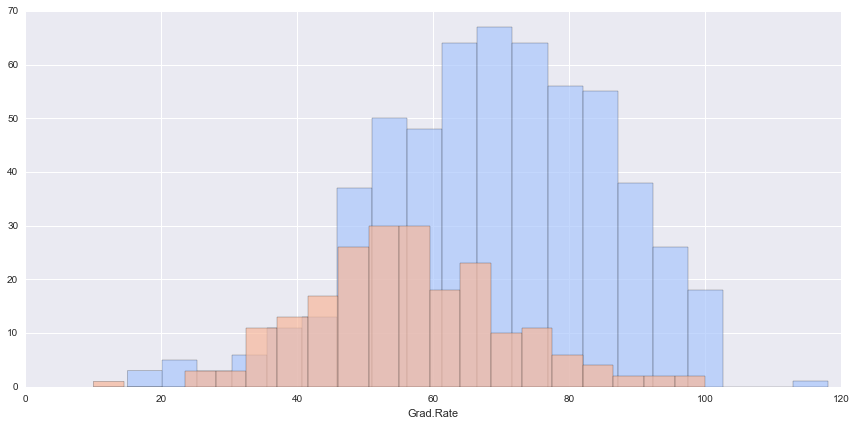

In [110]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

** Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [113]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [93]:
df['Grad.Rate']['Cazenovia College'] = 100

/Users/marci/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


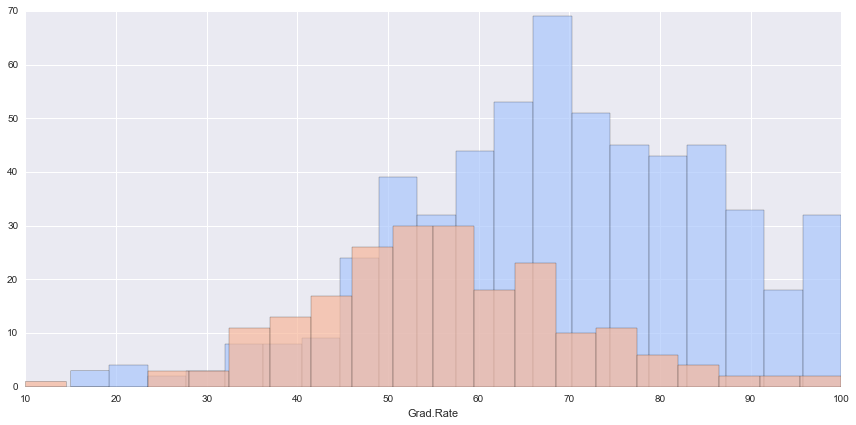

In [95]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

## K Means Cluster Initialization

In [10]:
from sklearn.cluster import KMeans

In [11]:
# Convert DataFrame to NumPy array
data_array = df.drop(['eat_inside_campus','eat_inside_campus_encoded'],axis=1)

In [12]:
## ARRAY TO STORE INTERTIA SCORES
silo_inertia_scores = {}
elbow_inertia_scores = {}

## Finding Optimal Combinations of n_clusters and n_init
* Both the silhouette score and the elbow method are commonly used techniques for finding the optimal values of n_clusters and n_init in clustering algorithms.

### Silhouette scores
* This process will calculate the silhouette score for different combinations of n_clusters and n_init values and plot the results. The combination with the highest silhouette score can be considered as the optimal choice based on the elbow method.
- The silhouette score measures the quality of clustering by considering both cohesion and separation of data points within and between clusters.
- It provides a quantitative evaluation of clustering quality, with scores ranging from -1 to 1, where higher scores indicate better-defined and well-separated clusters.
- The optimal number of clusters can be determined by selecting the value that maximizes the average silhouette score across different n_clusters and n_init values.
- The silhouette score is particularly useful when there is no ground truth available for evaluating the clustering results.

In [13]:
# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Define range of n_clusters and n_init values to try
n_clusters_range = range(2, 11)  # Try values from 2 to 10
n_init_range = range(5, 16)  # Try values from 5 to 15

In [14]:
for n_clusters in n_clusters_range:
    for n_init in n_init_range:
        # Create a KMeans instance with the current values of n_clusters and n_init
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_init)
        
        # Fit the KMeans model to your data
        kmeans.fit(data_array)
        
        # Get the inertia score and store it
        silo_inertia_scores[kmeans.inertia_] = f"{n_clusters} cluster and {n_init} init"
        
        # Get the silhouette score for the current model
        score = silhouette_score(data_array, kmeans.labels_)
        
        # Append the silhouette score to the list
        silhouette_scores.append((n_clusters, n_init, score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

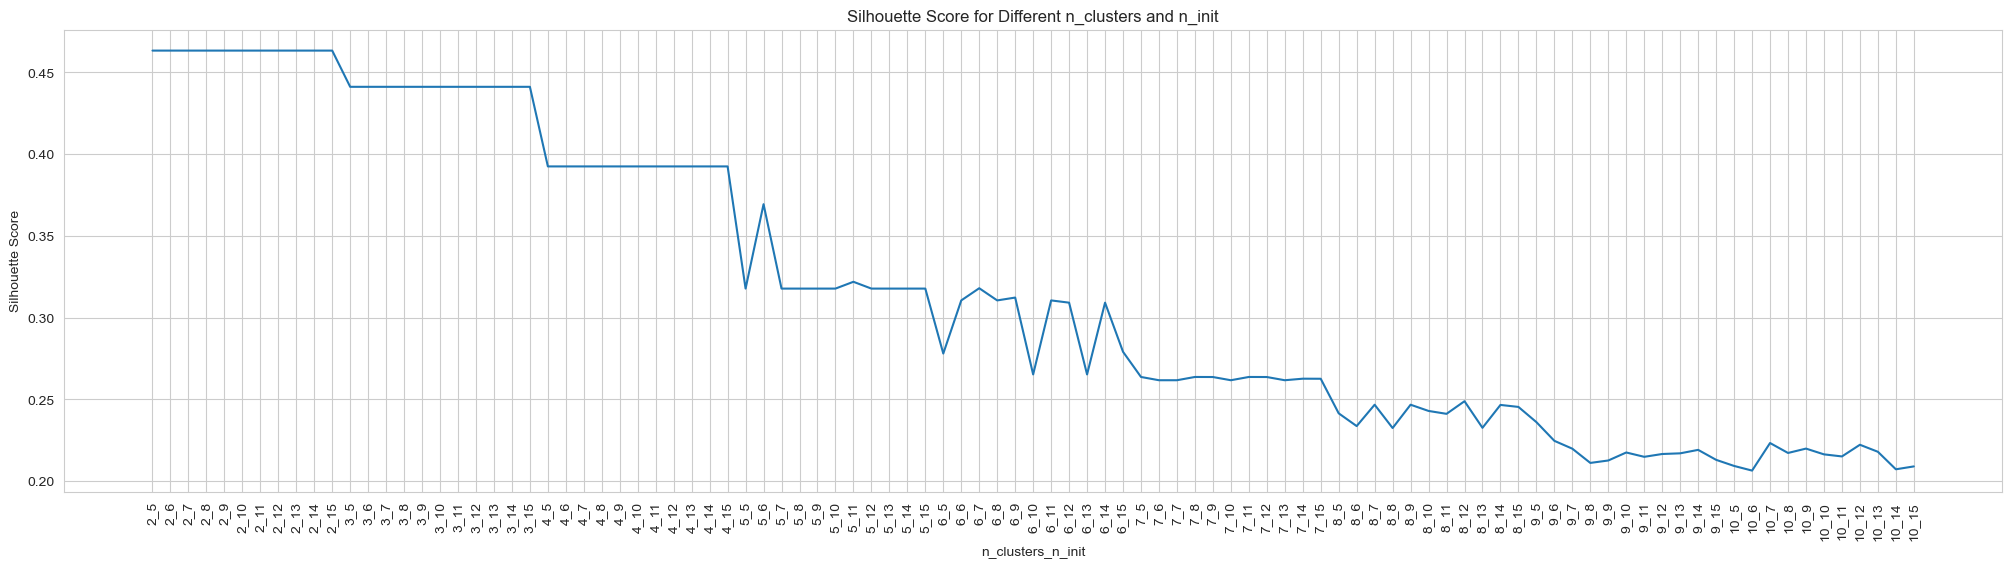

In [15]:
x = [f"{n_clusters}_{n_init}" for n_clusters, n_init, _ in silhouette_scores]
y = [score for _, _, score in silhouette_scores]

plt.figure(figsize=(25, 6))
plt.plot(x, y)
plt.xlabel('n_clusters_n_init')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different n_clusters and n_init')
plt.xticks(rotation='vertical')
plt.show()

In [16]:
best_score = max(silhouette_scores, key=lambda x: x[2])
best_n_clusters, best_n_init, best_score = best_score
print(f"Best combination: n_clusters={best_n_clusters}, n_init={best_n_init}, Silhouette Score={best_score}")

Best combination: n_clusters=2, n_init=5, Silhouette Score=0.46330879993250784


### Elbow Method
- The elbow method evaluates the clustering quality by analyzing the variance explained as a function of the number of clusters.
- It calculates the sum of squared distances of samples to their closest cluster centers, commonly known as the inertia or distortion.
- The goal is to select the number of clusters at the point where adding more clusters does not significantly reduce the distortion, resulting in an "elbow" shape in the plot.
- The elbow method is intuitive and easy to interpret, but it may not always provide a clear and definitive choice of the optimal number of clusters.

In [17]:
distortions = []

In [18]:
# Compute inertia for different combinations of n_clusters and n_init
for n_clusters in n_clusters_range:
    for n_init in n_init_range:
        # Create a KMeans instance with the current values of n_clusters and n_init
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_init)
        
        # Fit the KMeans model to your data
        kmeans.fit(data_array)
        
        # Get the inertia score and store it
        elbow_inertia_scores[kmeans.inertia_] = f"{n_clusters} cluster and {n_init} init"
        
        # Append the distortion value (inertia) to the list
        distortions.append((n_clusters, n_init, kmeans.inertia_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [19]:
x = [f"{n_clusters}_{n_init}" for n_clusters, n_init, _ in distortions]
y = [distortion for _, _, distortion in distortions]

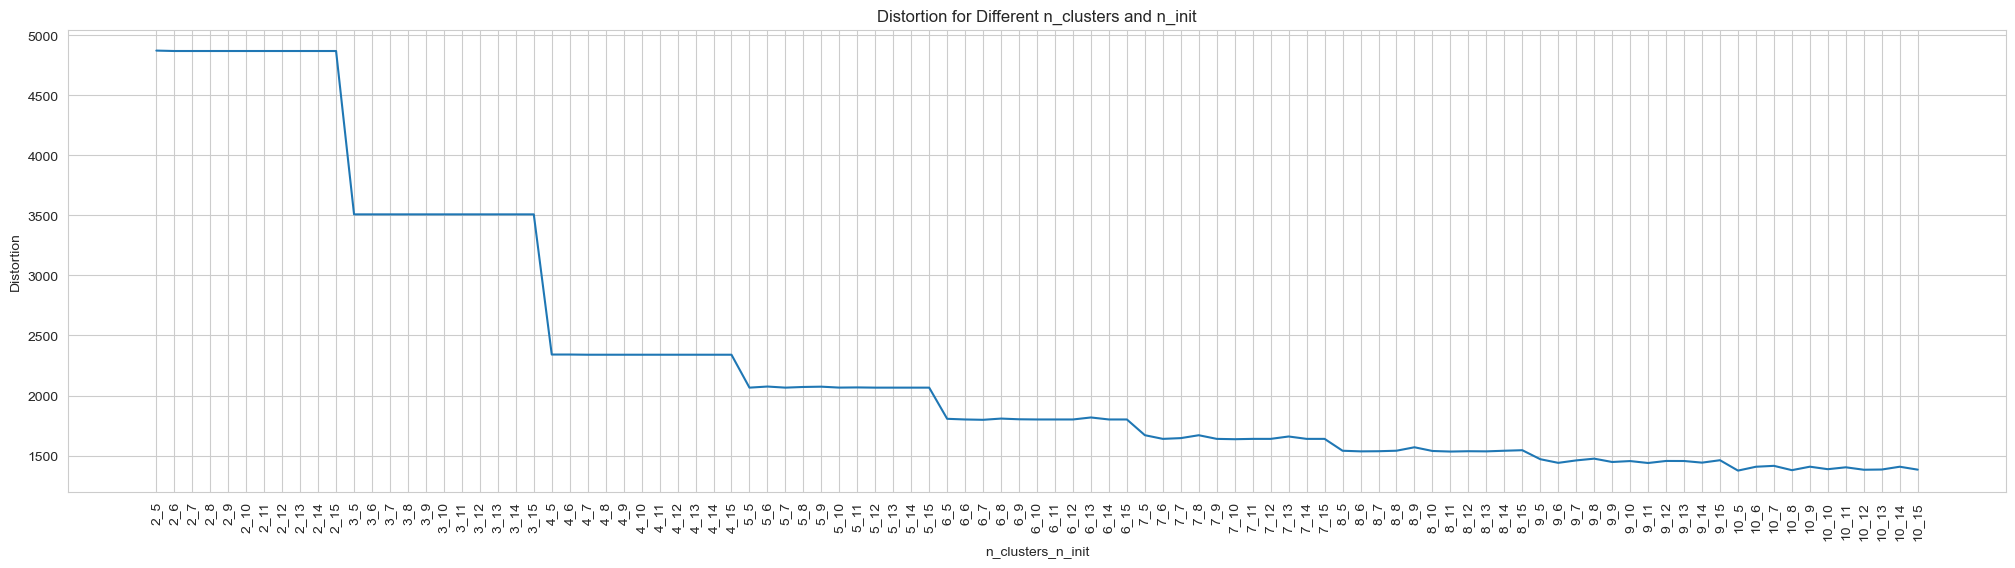

In [20]:
plt.figure(figsize=(25, 6))
plt.plot(x, y)
plt.xlabel('n_clusters_n_init')
plt.ylabel('Distortion')
plt.title('Distortion for Different n_clusters and n_init')
plt.xticks(rotation='vertical')
plt.show()

In [21]:
best_distortion = min(distortions, key=lambda x: x[2])
best_n_clusters, best_n_init, best_distortion = best_distortion
print(f"Best combination: n_clusters={best_n_clusters}, n_init={best_n_init}, Distortion={best_distortion}")

Best combination: n_clusters=10, n_init=5, Distortion=1374.467269984917


## KMeans Prediction

In [22]:
# Create a KMeans instance with the current values of n_clusters and n_init
kmeans = KMeans(n_clusters=2, n_init=6)
    
# Fit the KMeans model to your data
kmeans.fit(data_array)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init=6)

** What are the cluster center vectors?**

In [23]:
# kmeans.cluster_centers_

In [24]:
test_data = data_array  ##df['eat_inside_campus_encoded']

In [25]:
# Predict clusters for the data points
data = test_data
predicted_clusters= kmeans.predict(data)

In [26]:
predicted_clusters

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1])

## KMeans Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

** Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

## Without Ground Truth Labels

#### Inertia
* Inertia measures the sum of squared distances between each sample and its nearest centroid. Lower inertia indicates better clustering. 

In [27]:
kmeans.inertia_

4869.847408270239

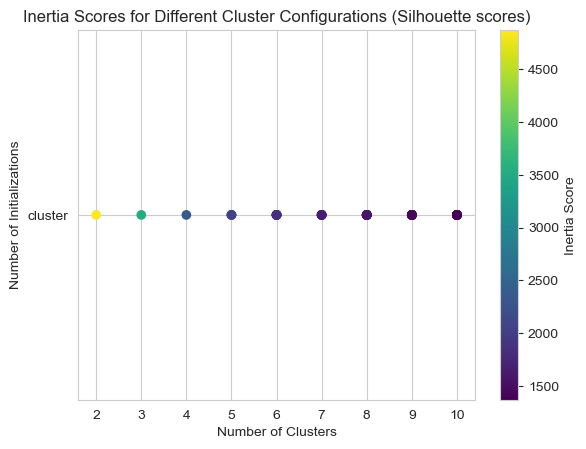

In [28]:
# Extract the inertia scores and corresponding cluster configurations
inertia_scores = list(silo_inertia_scores.keys())
cluster_configurations = list(silo_inertia_scores.values())

# Split the cluster configurations into separate lists for n_clusters and n_init
n_clusters_values = [config.split()[0] for config in cluster_configurations]
n_init_values = [config.split()[1] for config in cluster_configurations]

# Plot the inertia scores
plt.scatter(n_clusters_values, n_init_values, c=inertia_scores, cmap='viridis')
plt.colorbar(label='Inertia Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Initializations')
plt.title('Inertia Scores for Different Cluster Configurations (Silhouette scores)')
plt.show()

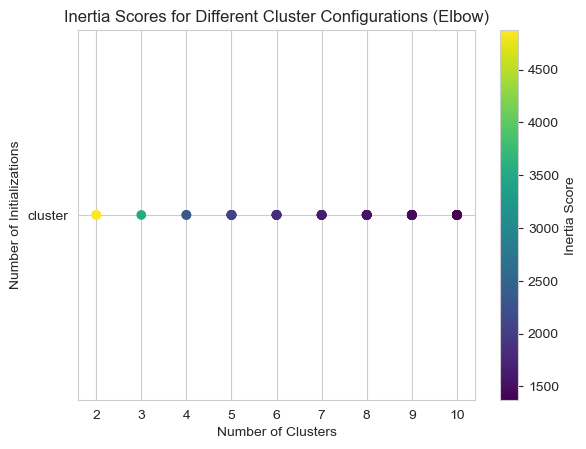

In [29]:
# Extract the inertia scores and corresponding cluster configurations
inertia_scores = list(elbow_inertia_scores.keys())
cluster_configurations = list(elbow_inertia_scores.values())

# Split the cluster configurations into separate lists for n_clusters and n_init
n_clusters_values = [config.split()[0] for config in cluster_configurations]
n_init_values = [config.split()[1] for config in cluster_configurations]

# Plot the inertia scores
plt.scatter(n_clusters_values, n_init_values, c=inertia_scores, cmap='viridis')
plt.colorbar(label='Inertia Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Initializations')
plt.title('Inertia Scores for Different Cluster Configurations (Elbow)')
plt.show()

* This score indicates the overall compactness of the clusters. A lower inertia score suggests that the samples within each cluster are closer to their respective cluster centers, indicating more compact and well-separated clusters. On the other hand, a higher inertia score suggests that the samples are more spread out and less compact within the clusters.

#### Silhouette Score:
* Silhouette score measures the cohesion and separation of clusters. It quantifies how well each sample fits within its own cluster compared to other clusters. A higher silhouette score indicates better-defined and well-separated clusters. 

In [30]:
silhouette_avg = silhouette_score(data, kmeans.labels_)
print(silhouette_avg)

0.46330879993250784


#### Calinski-Harabasz Index
* The Calinski-Harabasz index evaluates the ratio of between-cluster dispersion to within-cluster dispersion. Higher index values indicate better-defined and well-separated clusters. 

In [31]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(data, kmeans.labels_)

#### Visual Evaluation

In [32]:
# Obtain the cluster labels assigned by the K-means model
cluster_labels = kmeans.labels_

In [33]:
# Get the cluster centroids
centroids = kmeans.cluster_centers_

* Since we have a dataset with 15 features, it becomes challenging to visualize the clusters directly due to the high dimensionality. However, we can still explore the clusters visually using dimensionality reduction techniques such as Principal Component Analysis (PCA) and/or t-SNE to project the data onto a lower-dimensional space (e.g., 2D or 3D) for visualization.

### PCA Application
- PCA is a linear dimensionality reduction technique that identifies the directions (principal components) in the data that capture the maximum variance.
- It transforms the data into a new coordinate system by projecting it onto the principal components.
- The principal components are orthogonal to each other and ordered in terms of the amount of variance they explain.
- PCA is useful for reducing the dimensionality of the data while preserving the overall structure and capturing the most important patterns.
- It is primarily used for feature extraction, noise reduction, and visualization.

#### Cumulative Variance Explained
* The cumulative explained variance ratio indicates the proportion of the total variance explained by each additional principal component.
* Plot the cumulative explained variance ratio as a function of the number of components. This plot shows how much of the total variance in the data is explained by adding more components. You can then select the number of components that capture a significant portion of the variance. For example, if the plot shows that the first few components explain more than 90% of the variance, you can choose n_components accordingly.

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_array)

PCA()

In [35]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [36]:
# Find the index where cumulative explained variance exceeds 90%
n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1

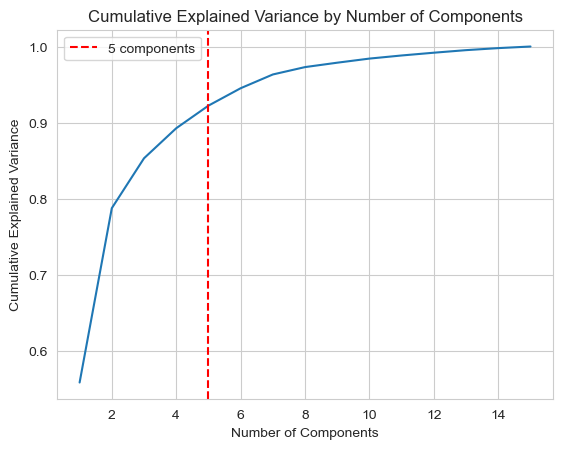

In [37]:
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.axvline(x=n_components, color='r', linestyle='--', label=f'{n_components} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.legend()
plt.show()

* **explained_variance_ratio_** - attribute of the PCA object contains the variance ratio explained by each principal component. 
* **np.cumsum() function** - calculates the cumulative sum of the explained variance ratios.

In [38]:
print(f"Number of components needed to explain at least 90% of the variance: {n_components}")

Number of components needed to explain at least 90% of the variance: 5


In [39]:
# Obtain the cluster labels assigned by the K-means model
cluster_labels = kmeans.labels_

In [40]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_array)

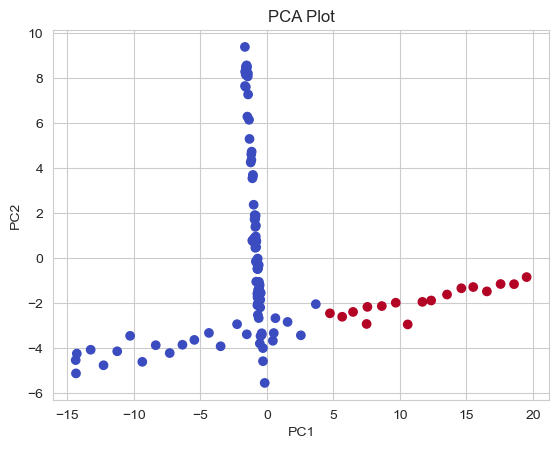

In [45]:
# Create the plot
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=cluster_labels, cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')

# Show the plot
plt.show()

* When plotting the clusters in 3D, we can only provide the first three principal components since a 3D plot can only display three dimensions.

### TSNE Application

- t-SNE is a nonlinear dimensionality reduction technique that emphasizes the local structure of the data by mapping high-dimensional data points to a lower-dimensional space.
- It focuses on preserving the pairwise distances between the data points, particularly the similarities or dissimilarities based on a distance metric (usually Euclidean distance).
- t-SNE is effective in visualizing complex, nonlinear relationships and revealing clusters or groups within the data.
- It is particularly useful for exploratory data analysis, visualization, and identifying hidden patterns or structures in the data.
- t-SNE is computationally more expensive than PCA and may not preserve global structure as well.

**Note:** t-SNE cannot be applied with more than 3 components (dimensions) because it relies on a quad-tree or oct-tree data structure. This algorithm is designed to optimize the computation time and memory usage for 2D and 3D visualizations.

In [42]:
# Apply t-SNE to the 2D PCA-transformed data
tsne = TSNE(n_components=2)
tsne_transformed_data = tsne.fit_transform(data_reduced)

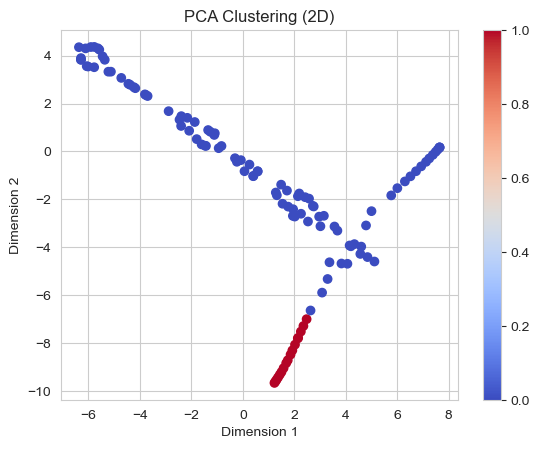

In [46]:
# Create a scatter plot
plt.scatter(tsne_transformed_data[:, 0], tsne_transformed_data[:, 1],  c=cluster_labels, cmap='coolwarm')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('PCA Clustering (2D)')
plt.colorbar()
plt.show()

#### Notes:
* PCA is a linear technique that captures the overall variance in the data, while t-SNE is a nonlinear technique that focuses on preserving local structure and revealing clusters or patterns. The choice between PCA and t-SNE depends on the specific goals of the analysis and the nature of the data.

## With Ground Truth Labels

In [44]:
# labels = data_reduced['cluster']

In [2]:
# # Compute confusion matrix
# cm = confusion_matrix(labels, predicted_clusters)


In [3]:
# # Compute classification report
# cr = classification_report(labels, predicted_clusters)

In [4]:
# # Print the confusion matrix and classification report
# print("Confusion Matrix:")
# print(cm)
# print("\nClassification Report:")
# print(cr)